<a href="https://colab.research.google.com/github/Ruqyai/Machine-Learning-Projects-For-Production/blob/master/Final-Math-Exam-Score/Final_Math_Exam_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Math Exam Score



<h1> Contents </h1>








* Understand Data 
* Model Development
* Save the Model





---

 





#Understand Data
 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of a high school. Please read the description of data set before start.

 

### Dataset info
This data approaches student achievement in a secondary school for Math. The data attributes include student grades, demographic, social and school related features. It was collected by using school reports and questionnaires.




###Import libraries




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.2.0


In [3]:
import logging
logging.getLogger('tensorflow').disabled = True

### Load the dataset

In [4]:
filename = "https://raw.githubusercontent.com/gdg-ml-team/DevFest19/master/student-math.csv"


###Read the dataset

In [5]:
df = pd.read_csv(filename)

##Data Exploration

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
# We need to represents the categorical values as numerical values
columns  = df.columns
for coloumn in columns :
    if (str(df[coloumn].dtype).startswith("object")):
            values = df[coloumn].unique()
            convertor = dict(zip(values,range(len(values))))
            print(coloumn,convertor)
            df[coloumn] = [float(convertor[item]) for item in df[coloumn]]

school {'GP': 0, 'MS': 1}
sex {'F': 0, 'M': 1}
address {'U': 0, 'R': 1}
famsize {'GT3': 0, 'LE3': 1}
Pstatus {'A': 0, 'T': 1}
Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Fjob {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}
reason {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian {'mother': 0, 'father': 1, 'other': 2}
schoolsup {'yes': 0, 'no': 1}
famsup {'no': 0, 'yes': 1}
paid {'no': 0, 'yes': 1}
activities {'no': 0, 'yes': 1}
nursery {'yes': 0, 'no': 1}
higher {'yes': 0, 'no': 1}
internet {'no': 0, 'yes': 1}
romantic {'no': 0, 'yes': 1}


In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,0.0,0.0,0.0,4,4,0.0,0.0,0.0,0.0,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,0.0,0.0,1.0,1,1,0.0,1.0,0.0,1.0,1,2,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,15,0.0,1.0,1.0,1,1,0.0,1.0,1.0,0.0,1,2,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,15,0.0,0.0,1.0,4,2,1.0,2.0,2.0,0.0,1,3,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,16,0.0,0.0,1.0,3,3,2.0,1.0,2.0,1.0,1,2,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    float64
 1   sex         395 non-null    float64
 2   age         395 non-null    int64  
 3   address     395 non-null    float64
 4   famsize     395 non-null    float64
 5   Pstatus     395 non-null    float64
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    float64
 9   Fjob        395 non-null    float64
 10  reason      395 non-null    float64
 11  guardian    395 non-null    float64
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    float64
 16  famsup      395 non-null    float64
 17  paid        395 non-null    float64
 18  activities  395 non-null    float64
 19  nursery     395 non-null    f

In [10]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [11]:
df = df.drop(['school', 'address', 'Pstatus', 'reason', 'nursery', 'romantic', 'Dalc',
       'Walc', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'sex', 'age', 'health'], axis =1)

In [12]:
df.columns

Index(['absences', 'G1', 'G2', 'G3'], dtype='object')



##Start Model Development



In [13]:
#Define labels and features
labels = df['G3'].values
features = df.drop(['G3'],axis=1).values

1. **Spilt data**

In [14]:
#Spilt the data; 30% for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(276, 3) (119, 3) (276,) (119,)



   2. **Bulid, Train and Evaluate the Model**


In [15]:
# Build The structure of Model
def build_model():
    model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=(1,3)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()

In [16]:
#Train the model
EPOCHS = 1000
model.fit(X_train, y_train, epochs=EPOCHS, verbose=2)

Epoch 1/1000
9/9 - 0s - loss: 159.3332 - mae: 11.1037 - mse: 159.3332
Epoch 2/1000
9/9 - 0s - loss: 52.5736 - mae: 6.2837 - mse: 52.5736
Epoch 3/1000
9/9 - 0s - loss: 20.8479 - mae: 3.8908 - mse: 20.8479
Epoch 4/1000
9/9 - 0s - loss: 9.6881 - mae: 2.5651 - mse: 9.6881
Epoch 5/1000
9/9 - 0s - loss: 5.7336 - mae: 1.7431 - mse: 5.7336
Epoch 6/1000
9/9 - 0s - loss: 4.7988 - mae: 1.4014 - mse: 4.7988
Epoch 7/1000
9/9 - 0s - loss: 4.5128 - mae: 1.3421 - mse: 4.5128
Epoch 8/1000
9/9 - 0s - loss: 4.3230 - mae: 1.2652 - mse: 4.3230
Epoch 9/1000
9/9 - 0s - loss: 4.4105 - mae: 1.3296 - mse: 4.4105
Epoch 10/1000
9/9 - 0s - loss: 4.2607 - mae: 1.2814 - mse: 4.2607
Epoch 11/1000
9/9 - 0s - loss: 4.4386 - mae: 1.3000 - mse: 4.4386
Epoch 12/1000
9/9 - 0s - loss: 4.2265 - mae: 1.2341 - mse: 4.2265
Epoch 13/1000
9/9 - 0s - loss: 4.1135 - mae: 1.2654 - mse: 4.1135
Epoch 14/1000
9/9 - 0s - loss: 3.9946 - mae: 1.1710 - mse: 3.9946
Epoch 15/1000
9/9 - 0s - loss: 4.3428 - mae: 1.2996 - mse: 4.3428
Epoch 16/1

In [17]:
#Evaluate the model
loss, mae, mse = model.evaluate(X_test,  y_test)
print("The mean absolute error: {:5.2f}".format(mae))
print("The mean squared error: {:5.2f}".format(mse))
print("The Loss: {:5.2f}".format(loss))

4/4 [==============================] - 0s 2ms/step - loss: 2.1848 - mae: 0.9250 - mse: 2.1848
The mean absolute error:  0.92
The mean squared error:  2.18
The Loss:  2.18


3. **Predict**

In [18]:
# Predict 
predict = model.predict(X_test)
idx= np.random.choice(X_test.shape[0]) 
print ("Predicted final grade : ", predict[idx])
print ("Real final grade : ", y_test[idx])

Predicted final grade :  [9.992431]
Real final grade :  10


4. **Visualize**

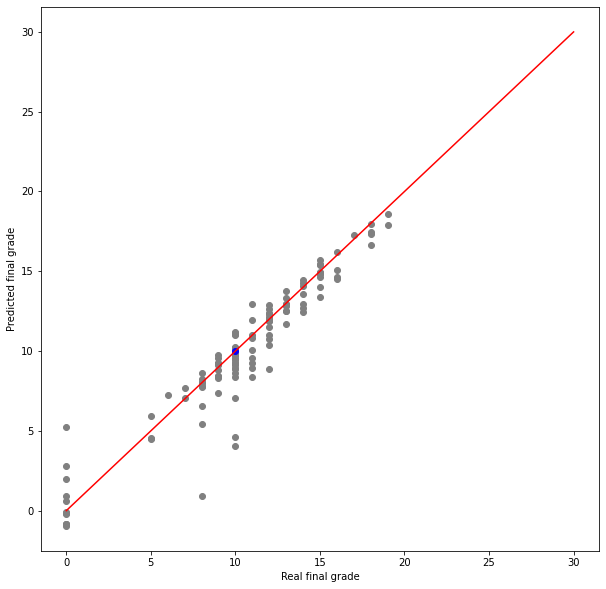

In [19]:
# visualization
plt.figure(figsize=(10,10))
plt.scatter(y_test, predict,  color='Grey')
plt.scatter(y_test[idx], predict[idx] , color='blue')
plt.xlabel('Real final grade')
plt.ylabel('Predicted final grade')
plt.plot([0, 30], [0, 30], color='red')

#Save, Load and Use the Model

In [20]:
model.save("saved.h5")

In [21]:
saved_model= tf.keras.models.load_model('saved.h5')

In [22]:
exmaple_input= [ 2 , 18,  20]
exmaple_predict= saved_model.predict(np.array( [exmaple_input,]))
z=np.array( [exmaple_input,])
print(z.shape)
print("Predicted example input : ", int(exmaple_predict))

(1, 3)
Predicted example input :  19


In [ ]:
!pip install tensorflowjs 

In [24]:
!mkdir model
!tensorflowjs_converter --input_format keras saved.h5 model/

In [25]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 7%)
  adding: model/model.json (deflated 75%)


In [26]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>